### Tutorial 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
data_sun = np.loadtxt("star_data_sun.txt")
time_val, vrad_val, vrad_err = data_sun.T

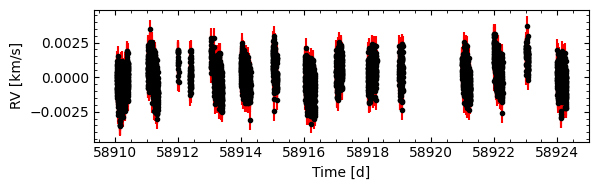

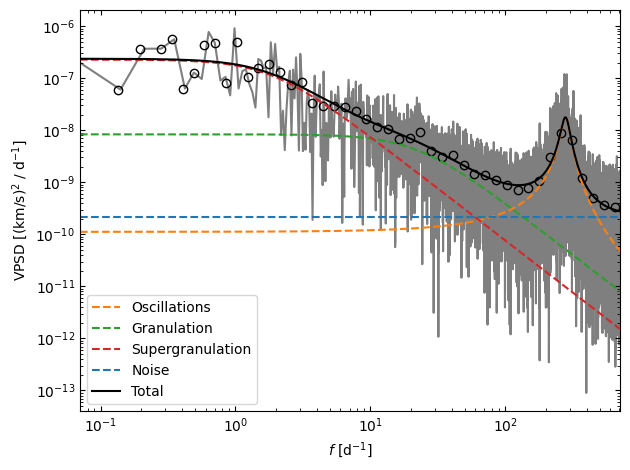

In [2]:
import arve
system = arve.ARVE()

system.id = "Sun_HARPS"
system.star.target = "Sun"
system.star.get_stellar_parameters()
system.data.add_data(time_val=time_val,
                     vrad_val=vrad_val,
                     vrad_err=vrad_err)
fig = system.data.plot_vrad(figsize=(6,2))
plt.show(fig)

system.star.compute_vpsd()
system.star.add_vpsd_components()
system.star.fit_vpsd_coefficients()
fig = system.star.plot_vpsd_components()
plt.show(fig)